# <b>KGlac ∩ Feast</b>

![KGlac + Feast](design.png)

In [1]:
import sys
import pandas as pd
sys.path.append('/Users/shubhamvashisth/Documents/borealisAI/projects/data_discovery/knowledge_graph/src/')
from feast import FeatureStore, FeatureService, FeatureView
from storage.elasticsearch_client import ElasticsearchClient
from storage.kglac_client import KGLacClient
from api.api import *
kglac = API(ElasticsearchClient(), KGLacClient('glac2')) 

#### <b>Predicting Feast's Entites and Feature Views using discovery operations</b>

In [2]:
kglac.predict_entities_and_feature_views(thresh=1, ttl=10000)

Predicted entities and feature view(s) File saved at:  feature_repo/predicted_register.py


In [3]:
kglac.get_all_tables()

,db_name,column_name
0,Retail Banking-demo-data,completedacct.parquet
1,Retail Banking-demo-data,completedcard.parquet
2,Retail Banking-demo-data,completedclient.parquet
3,Retail Banking-demo-data,completeddisposition.parquet
4,Retail Banking-demo-data,completeddistrict.parquet
5,Retail Banking-demo-data,completedloan.parquet
6,Retail Banking-demo-data,completedorder.parquet
7,Retail Banking-demo-data,crm_reviews.parquet
8,Retail Banking-demo-data,luxuryloanportfolio.parquet


In [4]:
df = kglac.search_tables_on([['account']])
df

,table_name,dataset_name,origin,number_of_columns,number_of_rows,path
0,completedorder.parquet,Retail Banking-demo-data,mock,7.0,6471.0,/Users/shubhamvashisth/Documents/borealisAI/pr...
1,completeddisposition.parquet,Retail Banking-demo-data,mock,5.0,5369.0,/Users/shubhamvashisth/Documents/borealisAI/pr...
2,completedacct.parquet,Retail Banking-demo-data,mock,9.0,4500.0,/Users/shubhamvashisth/Documents/borealisAI/pr...
3,completedloan.parquet,Retail Banking-demo-data,mock,14.0,682.0,/Users/shubhamvashisth/Documents/borealisAI/pr...


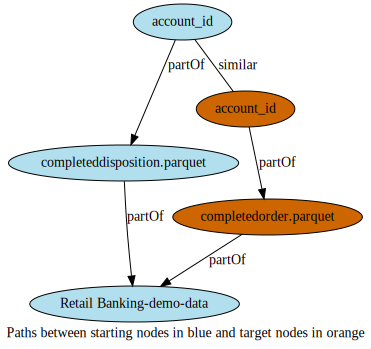

In [5]:
kglac.get_path_between_tables(df.iloc[1], df.iloc[0], hops=1)

In [6]:
df1 = pd.read_parquet(df.iloc[1].path)
df1

,disp_id,client_id,account_id,type,timestamp
0,D00000001,1,A00000001,Owner,2022-04-02 21:46:04.822220
1,D00000002,2,A00000002,Owner,2022-04-02 21:46:04.822220
2,D00000003,3,A00000002,User,2022-04-02 21:46:04.822220
3,D00000004,4,A00000003,Owner,2022-04-02 21:46:04.822220
4,D00000005,5,A00000003,User,2022-04-02 21:46:04.822220
...,...,...,...,...,...
5364,D00013647,13955,A00011349,Owner,2022-04-02 21:46:04.822220
5365,D00013648,13956,A00011349,User,2022-04-02 21:46:04.822220
5366,D00013660,13968,A00011359,Owner,2022-04-02 21:46:04.822220
5367,D00013663,13971,A00011362,Owner,2022-04-02 21:46:04.822220


In [7]:
df2 = pd.read_parquet(df.iloc[0].path)
df2

,order_id,account_id,bank_to,account_to,amount,k_symbol,timestamp
0,29401,A00000001,YZ,87144583,2452.0,Household Payment,2022-04-02 21:46:04.759962
1,29402,A00000002,ST,89597016,3372.7,Loan Payment,2022-04-02 21:46:04.759962
2,29403,A00000002,QR,13943797,7266.0,Household Payment,2022-04-02 21:46:04.759962
3,29404,A00000003,WX,83084338,1135.0,Household Payment,2022-04-02 21:46:04.759962
4,29405,A00000003,CD,24485939,327.0,None,2022-04-02 21:46:04.759962
...,...,...,...,...,...,...,...
6466,46334,A00011362,YZ,70641225,4780.0,Household Payment,2022-04-02 21:46:04.759962
6467,46335,A00011362,MN,78507822,56.0,None,2022-04-02 21:46:04.759962
6468,46336,A00011362,ST,40799850,330.0,Insurance Payment,2022-04-02 21:46:04.759962
6469,46337,A00011362,KL,20009470,129.0,None,2022-04-02 21:46:04.759962


In [8]:
res = df1.merge(df2, left_on='account_id', right_on='account_id')
res

,disp_id,client_id,account_id,type,timestamp_x,order_id,bank_to,account_to,amount,k_symbol,timestamp_y
0,D00000001,1,A00000001,Owner,2022-04-02 21:46:04.822220,29401,YZ,87144583,2452.0,Household Payment,2022-04-02 21:46:04.759962
1,D00000002,2,A00000002,Owner,2022-04-02 21:46:04.822220,29402,ST,89597016,3372.7,Loan Payment,2022-04-02 21:46:04.759962
2,D00000002,2,A00000002,Owner,2022-04-02 21:46:04.822220,29403,QR,13943797,7266.0,Household Payment,2022-04-02 21:46:04.759962
3,D00000003,3,A00000002,User,2022-04-02 21:46:04.822220,29402,ST,89597016,3372.7,Loan Payment,2022-04-02 21:46:04.759962
4,D00000003,3,A00000002,User,2022-04-02 21:46:04.822220,29403,QR,13943797,7266.0,Household Payment,2022-04-02 21:46:04.759962
...,...,...,...,...,...,...,...,...,...,...,...
7863,D00013663,13971,A00011362,Owner,2022-04-02 21:46:04.822220,46334,YZ,70641225,4780.0,Household Payment,2022-04-02 21:46:04.759962
7864,D00013663,13971,A00011362,Owner,2022-04-02 21:46:04.822220,46335,MN,78507822,56.0,None,2022-04-02 21:46:04.759962
7865,D00013663,13971,A00011362,Owner,2022-04-02 21:46:04.822220,46336,ST,40799850,330.0,Insurance Payment,2022-04-02 21:46:04.759962
7866,D00013663,13971,A00011362,Owner,2022-04-02 21:46:04.822220,46337,KL,20009470,129.0,None,2022-04-02 21:46:04.759962


In [9]:
df.iloc[0].path

'/Users/shubhamvashisth/Documents/borealisAI/projects/data_discovery/sample_data/parquet/Retail Banking-demo-data/completedorder.parquet'

![Feast_flow](feast_img.png)

In [11]:
store = FeatureStore('feature_repo/')
store.get_historical_features(
    features=[
        'predicted_feature_view_5:bank_to',
        'predicted_feature_view_5:account_to',
        'predicted_feature_view_5:k_symbol',
        'predicted_feature_view_5:order_id'],
    entity_df = df1
).to_df()

Using timestamp as the event timestamp. To specify a column explicitly, please name it event_timestamp.


,disp_id,client_id,account_id,type,timestamp,bank_to,account_to,k_symbol,order_id
0,D00000001,1,A00000001,Owner,2022-04-02 21:46:04.822220+00:00,YZ,87144583.0,Household Payment,29401.0
5757,D00003865,3865,A00003197,Owner,2022-04-02 21:46:04.822220+00:00,QR,34224891.0,Household Payment,34136.0
5755,D00003863,3863,A00003196,Owner,2022-04-02 21:46:04.822220+00:00,QR,20193255.0,Household Payment,34135.0
5752,D00003862,3862,A00003195,Owner,2022-04-02 21:46:04.822220+00:00,KL,48782503.0,Household Payment,34132.0
5751,D00003861,3861,A00003194,Owner,2022-04-02 21:46:04.822220+00:00,OP,46890920.0,Household Payment,34131.0
...,...,...,...,...,...,...,...,...,...
2872,D00001944,1944,A00001603,Owner,2022-04-02 21:46:04.822220+00:00,WX,92258166.0,Household Payment,31762.0
2871,D00001943,1943,A00001602,Owner,2022-04-02 21:46:04.822220+00:00,GH,6762600.0,Household Payment,31761.0
2870,D00001942,1942,A00001601,User,2022-04-02 21:46:04.822220+00:00,AB,43843287.0,Household Payment,31760.0
2868,D00001940,1940,A00001600,User,2022-04-02 21:46:04.822220+00:00,YZ,78760194.0,Household Payment,31759.0


In [12]:
os.chdir('feature_repo/')
!feast materialize-incremental 2022-07-01

Materializing 5 feature views to 2022-06-30 20:00:00-04:00 into the sqlite online store.

predicted_feature_view_3 from 1830-08-12 15:12:42-05:17:32 to 2022-06-30 20:00:00-04:00:
100%|█████████████████████████████████████████████████████████████| 77/77 [00:00<00:00, 5454.51it/s]
predicted_feature_view_5 from 1830-08-12 15:12:42-05:17:32 to 2022-06-30 20:00:00-04:00:
100%|█████████████████████████████████████████████████████████| 3758/3758 [00:00<00:00, 9199.47it/s]
predicted_feature_view_2 from 1830-08-12 15:12:43-05:17:32 to 2022-06-30 20:00:00-04:00:
100%|████████████████████████████████████████████████████████████| 77/77 [00:00<00:00, 11153.52it/s]
predicted_feature_view_4 from 1830-08-12 15:12:43-05:17:32 to 2022-06-30 20:00:00-04:00:
100%|█████████████████████████████████████████████████████████| 4500/4500 [00:00<00:00, 7049.72it/s]
predicted_feature_view_1 from 1830-08-12 15:12:44-05:17:32 to 2022-06-30 20:00:00-04:00:
100%|████████████████████████████████████████████████████████